In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.pyplot import title

from resources.mfcc import emphasis__, framing__, windowing__, fft__, melbank__, dct__
import numpy as np
from fastdtw import fastdtw

In [21]:
def vis_signal(y, sr, title):
  plt.figure(figsize=(10, 3))
  plt.title(title)
  librosa.display.waveshow(y, sr=sr)
def vis_emphasis(y_origin, y_emphasis, sr, title):
  s_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y_origin)), ref=np.max, top_db=None)
  s_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_emphasis)), ref=np.max, top_db=None)
  
  plt.figure(figsize=(15, 5))

  # Row 1 Col 1: Original signal spectrogram
  plt.subplot(2, 2, 1)
  librosa.display.specshow(s_orig, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Original Signal Spectrogram {title}')

  # Row 1 Col 2: Pre-emphasized signal spectrogram
  plt.subplot(2, 2, 2)
  librosa.display.specshow(s_preemph, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Pre-emphasized Signal Spectrogram {title}')

  # Row 2 Col 1: Original waveform
  plt.subplot(2, 2, 3)
  librosa.display.waveshow(y_origin, sr=sr)
  plt.title(f'Original Waveform {title}')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')

  # Row 2 Col 2: Pre-emphasized waveform
  plt.subplot(2, 2, 4)
  librosa.display.waveshow(y_emphasis, sr=sr)
  plt.title(f'Pre-emphasized Waveform {title}')
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.tight_layout()
  plt.show()
def vis_windowed(y, sr, title):
  plt.figure(figsize=(8, 3))
  plt.title(f"Windowed signal from {title}")
  librosa.display.waveshow(y, sr=sr)
  plt.show()
def vis_fft(y, title):
  plt.figure(figsize=(8, 3))
  plt.title(f"RFFT from {title}")
  plt.plot(y)
  plt.show()
def vis_triangle_melbank(nfilt, fbank, title):
  plt.title(title)
  plt.figure(figsize=(8, 3))
  for i in range(nfilt):
    plt.plot(fbank[i])
  plt.xlabel('FFT Bins')
  plt.ylabel('Amplitude')
  plt.grid(True)
  plt.show()
def plot_mel_spectrogram(mel_spectrogram, title):
  plt.figure(figsize=(8, 2))
  plt.imshow(mel_spectrogram.T, aspect='auto', origin='lower')
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Mel Spectrogram from {title}')
  plt.xlabel('Frame')
  plt.ylabel('Frequency [Hz]')
  plt.show()

def plot_mfcc_spectrogram(mfcc, title):
  plt.figure(figsize=(8, 2))
  plt.imshow(mfcc.T, aspect='auto', origin='lower')
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'MFCC Spectrogram from {title}')
  plt.xlabel('Frame')
  plt.ylabel('MFCC Coefficients')
  plt.show()

In [4]:
song_title = "Blank.mp3"
signal, sr = librosa.load("audio/train/Blank.mp3")

emphased_signal = emphasis__(signal)

framed_signal_05 = framing__(signal=emphased_signal, sampling_rate=sr, frame_size=0.5, frame_stride=0.25)
framed_signal_10 = framing__(signal=emphased_signal, sampling_rate=sr, frame_size=1, frame_stride=0.5)
framed_signal_15 = framing__(signal=emphased_signal, sampling_rate=sr, frame_size=1.5, frame_stride=0.75)

windowed_signal_05 = windowing__(signal=framed_signal_05, sampling_rate=sr, frame_size=0.5)
windowed_signal_10 = windowing__(signal=framed_signal_10, sampling_rate=sr, frame_size=1)
windowed_signal_15 = windowing__(signal=framed_signal_15, sampling_rate=sr, frame_size=1.5)

fft_signal_05 = fft__(signal=windowed_signal_05, NFFT=512)
fft_signal_10 = fft__(signal=windowed_signal_10, NFFT=512)
fft_signal_15 = fft__(signal=windowed_signal_15, NFFT=512)

melbank_signal_05, fbank_05 = melbank__(signal=fft_signal_05, nfilt=40, sr=sr, NFFT=512)
melbank_signal_10, fbank_10 = melbank__(signal=fft_signal_10, nfilt=40, sr=sr, NFFT=512)
melbank_signal_15, fbank_15 = melbank__(signal=fft_signal_15, nfilt=40, sr=sr, NFFT=512)

dct_signal_05 = dct__(signal=melbank_signal_05, coef=13)
dct_signal_10 = dct__(signal=melbank_signal_10, coef=13)
dct_signal_15 = dct__(signal=melbank_signal_15, coef=13)

# ORIGINAL SIGNAL

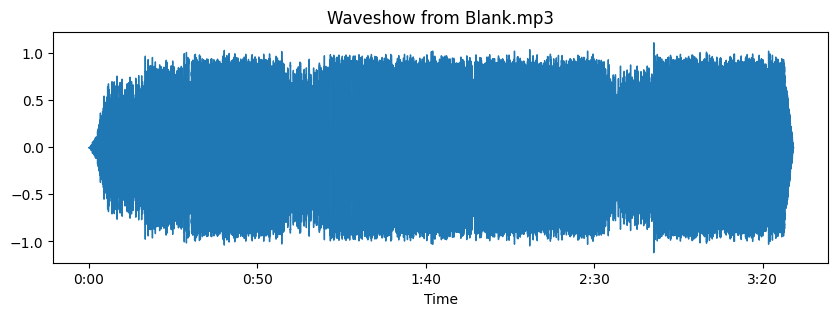

In [10]:
vis_signal(y=signal, sr=sr, title=f"Waveshow from {song_title}")

# PRE-EMPHASIS SIGNAL

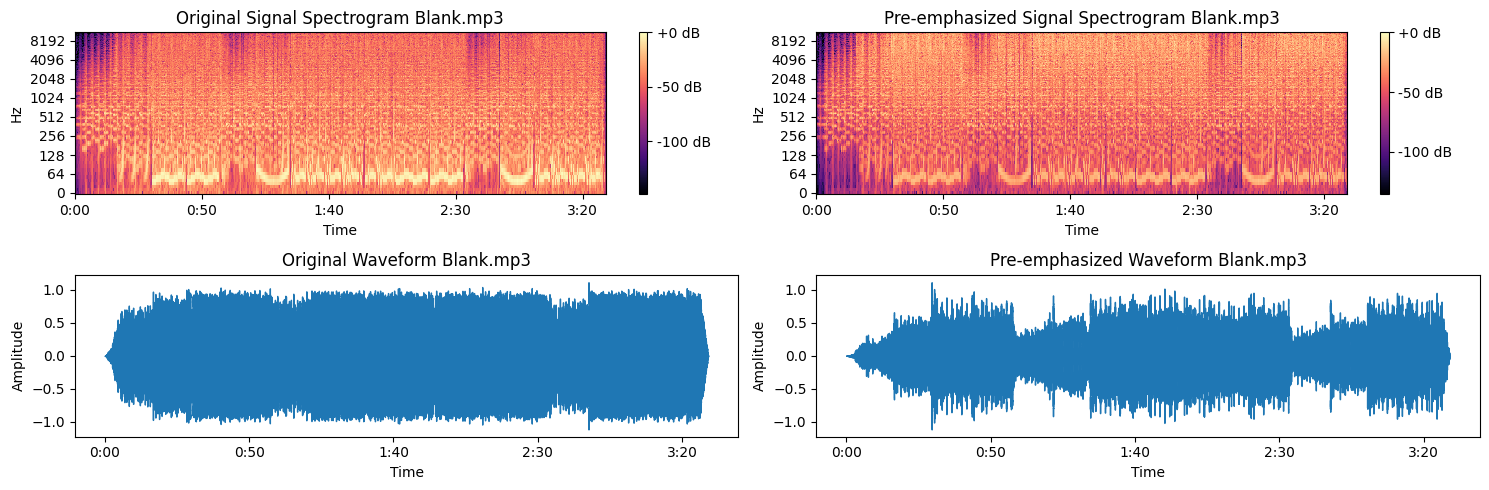

In [11]:
vis_emphasis(y_origin=signal, y_emphasis=emphased_signal, sr=sr, title=song_title)

# FRAMED AND WINDOWED SIGNAL

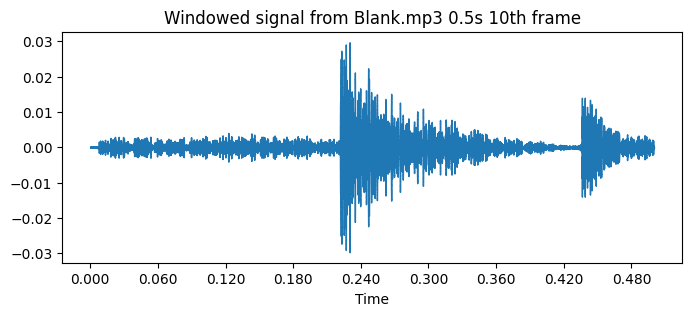

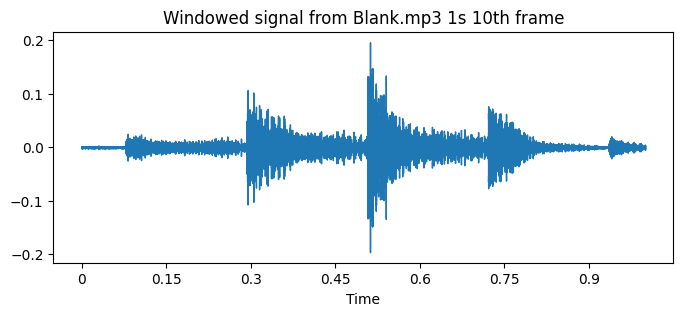

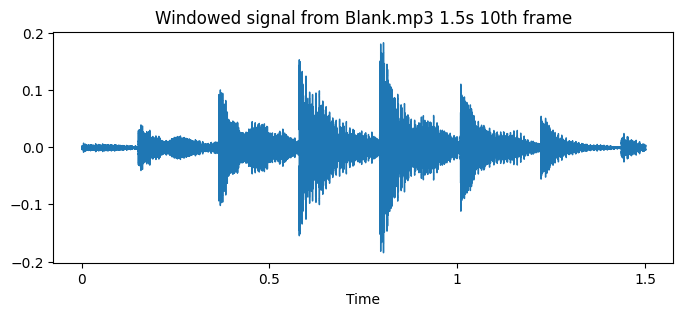

In [15]:
vis_windowed(y=windowed_signal_05[10], sr=sr, title=f"{song_title} 0.5s 10th frame")
vis_windowed(y=windowed_signal_10[10], sr=sr, title=f"{song_title} 1s 10th frame")
vis_windowed(y=windowed_signal_15[10], sr=sr, title=f"{song_title} 1.5s 10th frame")

# FFT SIGNAL

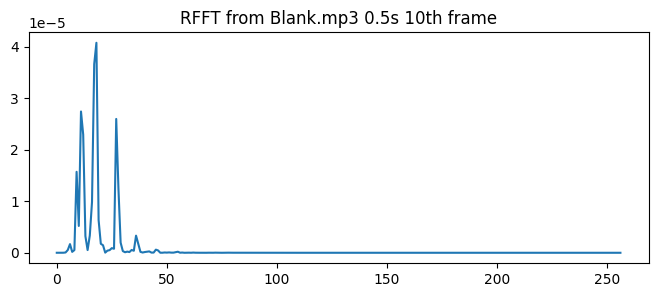

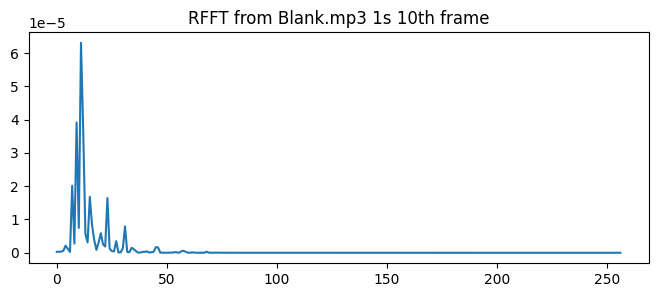

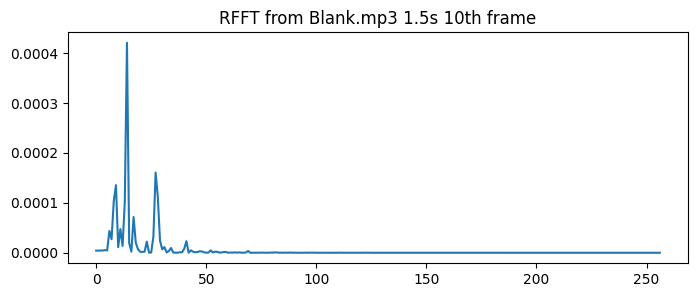

In [19]:
vis_fft(y=fft_signal_05[10], title=f"{song_title} 0.5s 10th frame")
vis_fft(y=fft_signal_10[10], title=f"{song_title} 1s 10th frame")
vis_fft(y=fft_signal_15[10], title=f"{song_title} 1.5s 10th frame")

# MELBANK FILTER

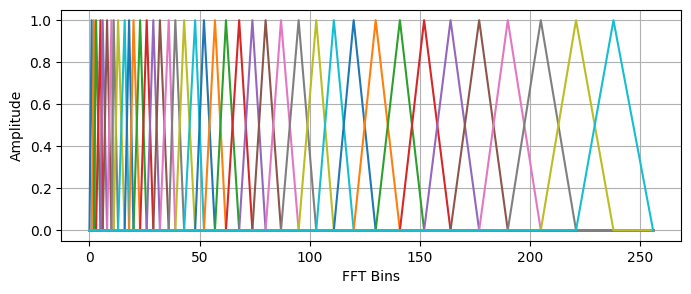

In [17]:
# vis_triangle_melbank(nfilt=40, fbank=fbank)

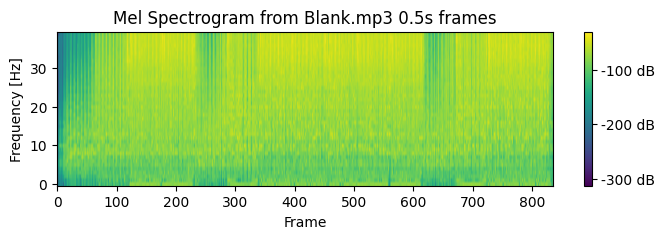

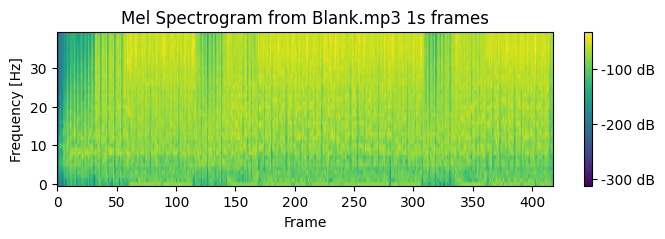

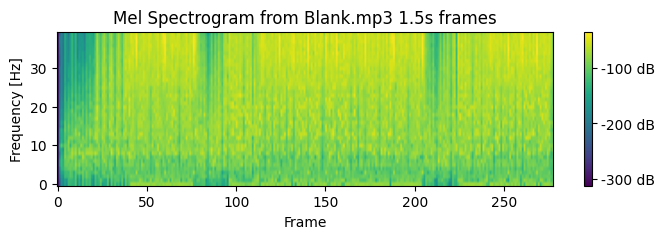

In [22]:
plot_mel_spectrogram(mel_spectrogram=melbank_signal_05, title=f"{song_title} 0.5s frames")
plot_mel_spectrogram(mel_spectrogram=melbank_signal_10, title=f"{song_title} 1s frames")
plot_mel_spectrogram(mel_spectrogram=melbank_signal_15, title=f"{song_title} 1.5s frames")

(418, 40)

# DCT

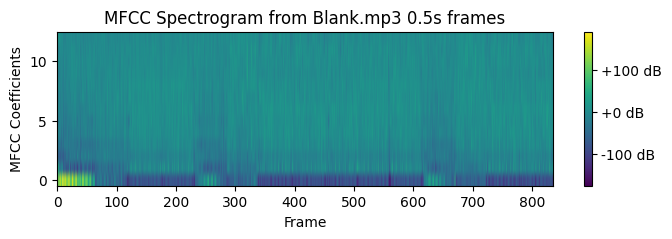

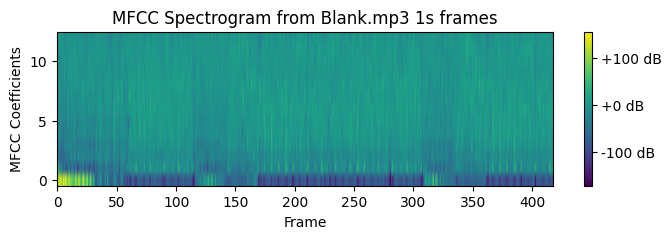

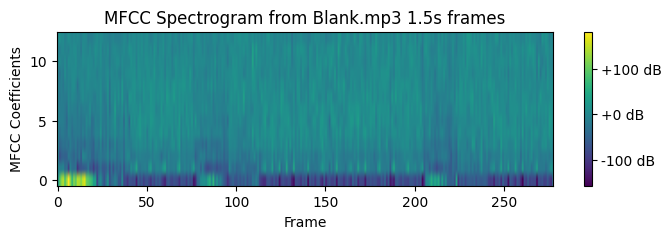

In [23]:
plot_mfcc_spectrogram(mfcc=dct_signal_05, title=f"{song_title} 0.5s frames")
plot_mfcc_spectrogram(mfcc=dct_signal_10, title=f"{song_title} 1s frames")
plot_mfcc_spectrogram(mfcc=dct_signal_15, title=f"{song_title} 1.5s frames")

# WARPING DTW

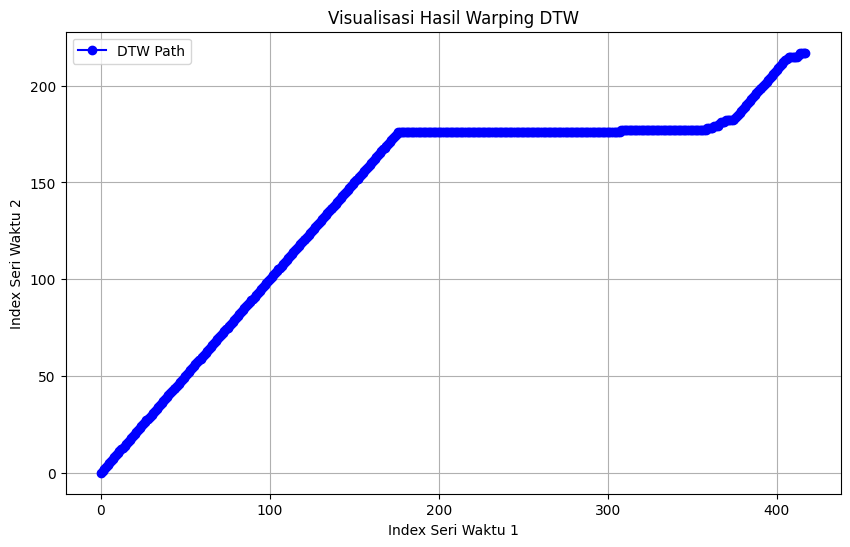

In [39]:
# signal_a = dct_signal
# signal_b = dct_signal_2
# 
# distance, path = fastdtw(signal_a, signal_b)
# # Data hasil warping DTW
# 
# # Memisahkan koordinat x dan y
# x = [point[0] for point in path]
# y = [point[1] for point in path]
# 
# # Membuat plot
# plt.figure(figsize=(10, 6))
# plt.plot(x, y, marker='o', linestyle='-', color='b', label='DTW Path')
# 
# # Menambahkan label dan judul
# plt.title('Visualisasi Hasil Warping DTW')
# plt.xlabel('Index Seri Waktu 1')
# plt.ylabel('Index Seri Waktu 2')
# plt.legend()
# 
# # Menampilkan plot
# plt.grid(True)
# plt.show()

In [32]:
# print(len(melbank_signal.T))

40
